# Solution of ODE

In a simple model of birth - death of cells with constant rate of birth and a rate of cell death linearly dependent on current number of cells is described by the following ODE:

$\Large{\frac{dn}{dt}}$ $= b - d \cdot n$

The solution is easy to obtain in analytical form by use of variable separation:

$n = -$ $\Large{\frac{e^{-d(t+c)}+b}{d}}$, $c \in {\rm I\!R}$ where c is determined by the initial population of cells $n_{0}$

# Simulations

In the simulations for the deterministic case, although this simple equation can be solved analytically, this is not usually the case with biological systems, therefore we use the package "DifferentialEquations" developed by Rackaukas et al. [[1]](#1).

In the stochastic case we use a package for julia with implementation of the Gillespie algorithm [[2]](#2). The package was not in the registry any more so a simple import could not be used so we transfered and modified the code accordinly to work with our package (which is permitted under the MIT license).

Simulations above were performed with the two functions implemented in this package specifically for the birth-death process `simulateBDDeterministic` and `simulateBDStochastic` for the deterministic and stochastic case respectively (see [here](../src/BDSimulator.jl) for source code). The simulations were run for two cases: Once for the default value of rates of birth ($b = 1, P_{b} = 1$) and for death rates sweeping all values from $10^{-2}$ to $10^2$ increasing the exponent by 1 and once for the default value of rate of death ($d = 1, P_{d} = 0.1$) and sweeping the same range for the birth rates as before.

The function accepts also the initial number of cells ($n_{0}$) to start the simulation with and the time span of the simulation. It is important to note that the rates also define the units of measurement for time.

In [1]:
push!(LOAD_PATH,"../src/")
using BDSimulator
using DataFrames
using Statistics
using Gadfly

sweep_range = range(-2,2)

deterministic_sims = Dict()
stochastic_sims = Dict()

for expon in sweep_range
    stochastic_sims["p_b=$(10.0^expon), p_d=0.1"] = simulateBDStochastic(p_b=10.0^expon, timeSpan=300.0, n0=10)
    stochastic_sims["p_d=$(10.0^expon), p_b=1.0"] = simulateBDStochastic(p_d=10.0^expon, timeSpan=300.0, n0=10)
    deterministic_sims["b=$(10.0^expon), d=0.1"] = simulateBDDeterministic(b=10.0^expon, timeSpan=300.0, n0=10)
    deterministic_sims["d=$(10.0^expon), b=1.0"] = simulateBDDeterministic(d=10.0^expon, timeSpan=300.0, n0=10)
end

In [2]:
stochastic_sims

Dict{Any, Any} with 10 entries:
  "p_d=0.01, p_b=1.0"  => 519×2 DataFrame…
  "p_d=1.0, p_b=1.0"   => 551×2 DataFrame…
  "p_b=0.1, p_d=0.1"   => 83×2 DataFrame…
  "p_d=10.0, p_b=1.0"  => 568×2 DataFrame…
  "p_d=100.0, p_b=1.0" => 592×2 DataFrame…
  "p_d=0.1, p_b=1.0"   => 600×2 DataFrame…
  "p_b=0.01, p_d=0.1"  => 24×2 DataFrame…
  "p_b=10.0, p_d=0.1"  => 5702×2 DataFrame…
  "p_b=1.0, p_d=0.1"   => 619×2 DataFrame…
  "p_b=100.0, p_d=0.1" => 59232×2 DataFrame…

We can see that the simulation results for the gillespie algorithm vary in size of the final results. This is to be expected as the waiting times depend on the propensities of reactions and with larger propensities the reaction fires more often. For example with the parameter $P_{b} = 100$ we have the largest resulting dataframe.

In [3]:
deterministic_sims

Dict{Any, Any} with 10 entries:
  "b=1.0, d=0.1"   => ODECompositeSolution{Float64, 1, Vector{Float64}, Nothing…
  "b=10.0, d=0.1"  => ODECompositeSolution{Float64, 1, Vector{Float64}, Nothing…
  "d=0.01, b=1.0"  => ODECompositeSolution{Float64, 1, Vector{Float64}, Nothing…
  "d=0.1, b=1.0"   => ODECompositeSolution{Float64, 1, Vector{Float64}, Nothing…
  "d=1.0, b=1.0"   => ODECompositeSolution{Float64, 1, Vector{Float64}, Nothing…
  "b=0.01, d=0.1"  => ODECompositeSolution{Float64, 1, Vector{Float64}, Nothing…
  "d=10.0, b=1.0"  => ODECompositeSolution{Float64, 1, Vector{Float64}, Nothing…
  "d=100.0, b=1.0" => ODECompositeSolution{Float64, 1, Vector{Float64}, Nothing…
  "b=0.1, d=0.1"   => ODECompositeSolution{Float64, 1, Vector{Float64}, Nothing…
  "b=100.0, d=0.1" => ODECompositeSolution{Float64, 1, Vector{Float64}, Nothing…

The deterministic simulations produce `ODESolution` objects that contain vectors for the solution `t` for time and `u` for value that can be plotted directly, or alternatively the object can be called with any value for the timestep, as a function to yield a "fine" interpolation of the result. For example:

In [4]:
println(deterministic_sims["d=0.01, b=1.0"].t)
println(deterministic_sims["d=0.01, b=1.0"].u)


println(deterministic_sims["d=0.01, b=1.0"](5.01))
println(deterministic_sims["d=0.01, b=1.0"](5.02))

[0.0, 0.16186769543641635, 1.78054464980058, 12.346704991960767, 32.38653614777224, 58.817959164709706, 92.94988761907635, 135.19051921681557, 186.529495135893, 247.72684952429483, 300.0]
[10.0, 10.14556308430512, 11.58830795657843, 20.45343125750422, 34.89871320537146, 50.019640059798476, 64.4723565096166, 76.71275391228268, 86.06337417677703, 92.44233788549136, 95.51904930399083]
14.397912616627004
14.406472397627804


# PLOTS

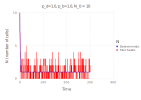

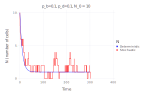

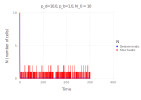

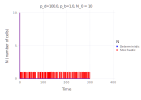

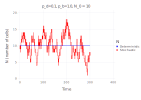

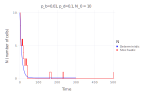

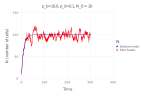

In [5]:
for (k, v) in stochastic_sims

    plot_theme = Theme(
        panel_fill=colorant"white",
        default_color=colorant"black"
    )
    p = plot(v,
        layer(x=deterministic_sims[replace(k, "p_" => "")].t,y=deterministic_sims[replace(k, "p_" => "")].u,Geom.line,Theme(default_color=colorant"blue")),
        layer(x=:time,y=:x1,Geom.step,Theme(default_color=colorant"red")),
        Guide.xlabel("Time"),
        Guide.ylabel("N (number of cells)"),
        Guide.title("$(k), N_0 = 10"),
        Guide.manual_color_key("N",["Deterministic", "Stochastic"],["blue","red"]),
        plot_theme
    )
    display(p)
end

# Observations:

- The steady state of the system is $N_{stationary} = \Large \frac{b}{d}$
- When $N_{stationary} < 1$ then the average time the system is in state $N=0$ is accordingly small or large.
- The birth rate $b$ or $P_b$ and the difference $N_{0} - N_{stationary}$ define the time to reach steady state.  
- The system's noise depends on the ratio ${\Large \frac{b}{d}}$.

# Summary statistics

To view more closely what happens in the steady state of the system and show comparisons in terms of those we rerun the simulations setting $N_{0} = [\frac{b}{d}]$ (in the closest integer value of the steady state).

In [8]:
stochastic_sims_stationary_sweep_b = Dict()
stochastic_sims_stationary_sweep_d = Dict()

for expon in sweep_range
    stochastic_sims_stationary_sweep_b[10.0^expon] = 
        simulateBDStochastic(p_b=10.0^expon, timeSpan=300.0, n0=floor(Int, round(10.0^expon/0.1)))
    stochastic_sims_stationary_sweep_d[10.0^expon] = 
        simulateBDStochastic(p_d=10.0^expon, timeSpan=300.0, n0=floor(Int, round(1/10.0^expon)))
end

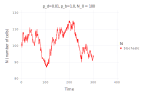

In [9]:
plot_theme = Theme(
    panel_fill=colorant"white",
    default_color=colorant"black"
)
p = plot(stochastic_sims_stationary_sweep_d[0.01],
    layer(x=:time,y=:x1,Geom.step,Theme(default_color=colorant"red")),
    Guide.xlabel("Time"),
    Guide.ylabel("N (number of cells)"),
    Guide.title("p_d=0.01, p_b=1.0, N_0 = 100"),
    Guide.manual_color_key("N",["Stochastic"],["red"]),
    plot_theme
)


In [10]:

df_sweep_b = DataFrame(BIRTH_RATE=Float64[], BIRTH_RATE_S=String[], N_MEAN = Float64[], N_STD = Float64[])
df_sweep_d = DataFrame(DEATH_RATE=Float64[], DEATH_RATE_S=String[], N_MEAN = Float64[], N_STD = Float64[])

for (k, v) in stochastic_sims_stationary_sweep_b
    push!(df_sweep_b,[k "$k" mean(v.x1) std(v.x1)])
end

for (k, v) in stochastic_sims_stationary_sweep_d
    push!(df_sweep_d,[k "$k" mean(v.x1) std(v.x1)])
end
df_sweep_b = sort(df_sweep_b)


5×4 DataFrame
 Row │ BIRTH_RATE  BIRTH_RATE_S  N_MEAN      N_STD     
     │ Float64     String        Float64     Float64   
─────┼─────────────────────────────────────────────────
   1 │       0.01  0.01             0.5       0.534522
   2 │       0.1   0.1              1.74603   1.36746
   3 │       1.0   1.0             10.73      2.3891
   4 │      10.0   10.0            98.0241    9.09928
   5 │     100.0   100.0         1000.29     26.469

In [15]:
df_sweep_d = sort(df_sweep_d)

5×4 DataFrame
 Row │ DEATH_RATE  DEATH_RATE_S  N_MEAN      N_STD    
     │ Float64     String        Float64     Float64  
─────┼────────────────────────────────────────────────
   1 │       0.01  0.01          102.415     6.96244
   2 │       0.1   0.1            11.1271    3.32441
   3 │       1.0   1.0             1.24825   1.03083
   4 │      10.0   10.0            0.594156  0.585098
   5 │     100.0   100.0           0.513423  0.513503

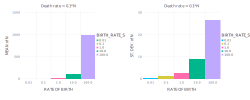

In [16]:
Gadfly.set_default_plot_size(25cm, 10cm)

p1 = plot(df_sweep_b, x=:BIRTH_RATE_S, y = :N_MEAN, Geom.bar, color=:BIRTH_RATE_S,
    Guide.title("Death rate = 0.1*N"), Guide.xlabel("RATE OF BIRTH"), Guide.ylabel("MEAN of N"))

p2 = plot(df_sweep_b, x=:BIRTH_RATE_S, y = :N_STD, Geom.bar, color=:BIRTH_RATE_S,
    Guide.title("Death rate = 0.1*N"), Guide.xlabel("RATE OF BIRTH"), Guide.ylabel("ST. DEV. of N"))

hstack(p1,p2)


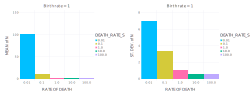

In [17]:
p1 = plot(df_sweep_d, x=:DEATH_RATE_S, y = :N_MEAN, Geom.bar, color=:DEATH_RATE_S,
    Guide.title("Birth rate = 1"), Guide.xlabel("RATE OF DEATH"), Guide.ylabel("MEAN of N"))

p2 = plot(df_sweep_d, x=:DEATH_RATE_S, y = :N_STD, Geom.bar, color=:DEATH_RATE_S,
    Guide.title("Birth rate = 1"), Guide.xlabel("RATE OF DEATH"), Guide.ylabel("ST. DEV. of N"))

hstack(p1,p2)

## References

<a id="1">[1]</a> 
Rackauckas, C., & Nie, Q. (2017). Differentialequations. jl–a performant and feature-rich ecosystem for solving differential equations in julia. Journal of open research software, 5(1).

<a id="2">[2]</a> 
Frost, Simon D.W. (2016) Gillespie.jl: Stochastic Simulation Algorithm in Julia. Journal of Open Source Software 1(3) doi:0.21105/joss.00042